# Importação de arquivos

**Considerando o tamanho dos arquivos e a ocorrência de erros no servidor durante as importações, estas serão feitas por lotes.**

O tempo médio de execução desse trecho é de 26min

In [ ]:
import requests
import pandas as pd
from io import StringIO

# Dicionário de URLs
urls = {
    (2014, 1): 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2014-01.csv',
    (2014, 2): 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2014-02.csv',
    (2015, 1): 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2015-01.csv',
    (2015, 2): 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2015-02.csv',
    (2016, 1): 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2016-01.csv',
    (2016, 2): 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2016-02.csv',
    (2017, 1): 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2017-01.csv',
    (2017, 2): 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2017-02.csv',
    (2018, 1): 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2018-01.csv',
    (2018, 2): 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2018-02.csv',
    (2019, 1): 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2019-01.csv',
    (2019, 2): 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2019-02.csv',
    (2020, 1): 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2020-01.csv',
    (2020, 2): 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2020-02.csv',
    (2021, 1): 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2021-01.csv',
    (2021, 2): 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2021-02.csv',
    (2022, 1): 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-05.csv',
    (2022, 2): 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-07.csv',
    (2023, 1): 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-05.csv',
    (2023, 2): 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-07.csv',
    (2024, 1): 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2024/precos-gasolina-etanol-05.csv'
}

# Dicionário para armazenar os dataframes
dataframes = {}

# Função para baixar o arquivo em chunks
def download_file(url):
    chunk_size = 1024  # Define o tamanho do chunk
    response = requests.get(url, stream=True)
    response.raise_for_status()
    return response.iter_content(chunk_size=chunk_size)

# Loop para baixar e carregar os arquivos
for key, url in urls.items():
    try:
        print(f"Baixando: {url}")
        chunks = download_file(url)
        file_content = ''
        for chunk in chunks:
            file_content += chunk.decode('latin-1')
        df = pd.read_csv(StringIO(file_content), sep=';')
        dataframes[key] = df
        print(f"Arquivo {key} carregado com sucesso.")
    except Exception as e:
        print(f"Erro ao baixar o arquivo {key}: {e}")


Alternativa mais rápida para importação

In [ ]:
pip install gdown

In [ ]:
import pandas as pd

# Defina o dicionário com os IDs dos arquivos do Google Drive
urls = {
    (2014, 1): 'file_2014_1.csv',
    (2014, 2): 'file_2014_2.csv',
    (2015, 1): 'file_2015_1.csv',
    (2015, 2): 'file_2015_2.csv',
    (2016, 1): 'file_2016_1.csv',
    (2016, 2): 'file_2016_2.csv',
    (2017, 1): 'file_2017_1.csv',
    (2017, 2): 'file_2017_2.csv',
    (2018, 1): 'file_2018_1.csv',
    (2018, 2): 'file_2018_2.csv',
    (2019, 1): 'file_2019_1.csv',
    (2019, 2): 'file_2019_2.csv',
    (2020, 1): 'file_2020_1.csv',
    (2020, 2): 'file_2020_2.csv',
    (2021, 1): 'file_2021_1.csv',
    (2021, 2): 'file_2021_2.csv',
    (2022, 1): 'file_2022_1.csv',
    (2022, 2): 'file_2022_2.csv',
    (2023, 1): 'file_2023_1.csv',
    (2023, 2): 'file_2023_2.csv',
    (2024, 1): 'file_2024_1.csv'
}

dataframes = {}

for key, file_id in urls.items():
    df = pd.read_csv(file_id, sep=';', encoding='latin-1')
    dataframes[key] = df


<ipython-input-2-2e0a33e47862>:31: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_id, sep=';', encoding='latin-1')


In [1]:
import gdown
import pandas as pd

# Defina o dicionário com os IDs dos arquivos do Google Drive
urls = {
    (2014, 1): '15eVuNVw4r_lP0ut6SheKaPFbyBEIbLki',
    (2014, 2): '1rlzQMVmtZ11NQdlbzHLLy3P37bRgvz62',
    (2015, 1): '1w2Iic29SKRNuQEn6bgkwpcM8rzuEC4ql',
    (2015, 2): '1xlBoFLOWteWv4DePwPGkug5ePzhBs80U',
    (2016, 1): '1wDgNkhNpmi_r6p6tflhC-Es6EsX1DaZC',
    (2016, 2): '108fIJXfJ3TJUuwRhIGgoUCLcZ1m6_qIn',
    (2017, 1): '1HhdjBOTVkXPgi5vfqCVI2FF181KlqaZQ',
    (2017, 2): '1FpO8E_HGLfyZB1IRdp5b8BQUj3FX_TZu',
    (2018, 1): '1ERw9i9CYi2rEZckNvJ_35TcxEkXgc_XL',
    (2018, 2): '1EHgE48TN10ZtyMvHY1--w8RCXo6M03-I',
    (2019, 1): '1b6RFDvnxEJe7eycEcK_uy20v8GLqygg-',
    (2019, 2): '1NKyoUd3GyEvDHWosre50znKQSwmoV-4j',
    (2020, 1): '1Iv-h-PW78nMFow0M9OGD1JV0pEWnrmpo',
    (2020, 2): '1KRIUqGejeSyWY-abxqF8Oo7xYdbtetEy',
    (2021, 1): '1_RKo8ZzqeHsYq4CDQTs9j3SZZi7sVjGG',
    (2021, 2): '15EnFiay9R7dlXPvT5RXU70ztGRieMlfT',
    (2022, 1): '1JMovPp5uU-3C1vJUHRX14IVSkP40gDNZ',
    (2022, 2): '1gSOqRXbcigjj_FD4gJg9Oth7ikNNkSVn',
    (2023, 1): '10tCX3uz0oaJMaw9fIV8diExNWFWAj9SR',
    (2023, 2): '1PrTZIDeGRR84DKjQXByu8GvcHfD7_DLd',
    (2024, 1): '1SRQ9qF8FodUYG3hL4tUBwdP57FmpgmlM'
}

dataframes = {}

for key, file_id in urls.items():
    # Crie a URL de download usando a biblioteca gdown
    url = f'https://drive.google.com/uc?id={file_id}'

    # Nome do arquivo onde o CSV será salvo
    output_file = f'file_{key[0]}_{key[1]}.csv'

    # Faça o download do arquivo CSV
    gdown.download(url, output_file, quiet=False)

    # Leia o arquivo CSV em um DataFrame
    df = pd.read_csv(output_file, sep=';', encoding='latin-1')
    dataframes[key] = df


Downloading...
From (original): https://drive.google.com/uc?id=15eVuNVw4r_lP0ut6SheKaPFbyBEIbLki
From (redirected): https://drive.google.com/uc?id=15eVuNVw4r_lP0ut6SheKaPFbyBEIbLki&confirm=t&uuid=000b4e44-41b0-4d13-b5ea-80ea80309635
To: /content/file_2014_1.csv
100%|██████████| 120M/120M [00:01<00:00, 71.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1rlzQMVmtZ11NQdlbzHLLy3P37bRgvz62
From (redirected): https://drive.google.com/uc?id=1rlzQMVmtZ11NQdlbzHLLy3P37bRgvz62&confirm=t&uuid=ffcb74b7-1805-4ee1-bbbe-154986df30b4
To: /content/file_2014_2.csv
100%|██████████| 127M/127M [00:02<00:00, 50.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1w2Iic29SKRNuQEn6bgkwpcM8rzuEC4ql
From (redirected): https://drive.google.com/uc?id=1w2Iic29SKRNuQEn6bgkwpcM8rzuEC4ql&confirm=t&uuid=ebf6d225-7ab4-416e-8d89-34d5cf3c9317
To: /content/file_2015_1.csv
100%|██████████| 122M/122M [00:01<00:00, 91.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xlBoFLOW

**Como não há garantia de padronização entre o formato dos dados fornecidos, vamos verificar se todos os dataframes possuem a mesma quantidade de colunas e se essas são iguais**

In [2]:
def check_dataframe_consistency(dataframes):
    # Vamos usar o primeiro dataframe (referente ao primeiro semestre de 2014) como referência
    num_cols = len(dataframes[next(iter(dataframes))].columns)
    col_names = set(dataframes[next(iter(dataframes))].columns)

    for key, df in dataframes.items():
        if len(df.columns) != num_cols:
            return f"Dataframe {key} tem uma quantidade diferente de colunas."

        if set(df.columns) != col_names:
            different_columns = set(col_names) ^ set(df.columns)
            return f"Dataframe {key} tem colunas diferentes. Segue nome da coluna destoante e o nome da mesma coluna nos outros arquivos: {different_columns}"

    return "Todos os dataframes possuem a mesma quantidade de colunas e mesmo nome para elas."

consistent = check_dataframe_consistency(dataframes)
print(consistent)


Dataframe (2021, 2) tem colunas diferentes. Segue nome da coluna destoante e o nome da mesma coluna nos outros arquivos: {'Regiao - Sigla', 'ï»¿Regiao - Sigla'}


Todos os arquivos possuem a mesma quantidade de colunas e apenas o título de uma é diferente. Vamos igualar e verificar novamente a consistência.

In [3]:
def equalize_column_names(dataframes):
  # Define o primeiro dataframe como referência
  reference_df = next(iter(dataframes.values()))

  for df in dataframes.values():
    df.columns = reference_df.columns

  return dataframes

dataframes = equalize_column_names(dataframes)

consistent = check_dataframe_consistency(dataframes)
print(consistent)


Todos os dataframes possuem a mesma quantidade de colunas e mesmo nome para elas.


In [4]:
combined_df = pd.concat(dataframes)
combined_df.shape

(7849631, 16)

In [5]:
import random
sample_size = int(len(combined_df) * 0.08)
combined_df_sample = random.sample(list(combined_df.index), sample_size)
combined_df_sample_df = combined_df.loc[combined_df_sample]
combined_df_sample_df.shape

(627970, 16)

Estamos interessados somente nas entradas referentes a gasolina

In [6]:
gasolina_df = combined_df_sample_df[combined_df_sample_df['Produto'] == 'GASOLINA'].copy()
gasolina_df.shape

(190670, 16)

In [7]:
# excluindo variável para liberar RAM

del dataframes


# Definição de tipos

In [8]:
gasolina_df.dtypes

ï»¿Regiao - Sigla    object
Estado - Sigla       object
Municipio            object
Revenda              object
CNPJ da Revenda      object
Nome da Rua          object
Numero Rua           object
Complemento          object
Bairro               object
Cep                  object
Produto              object
Data da Coleta       object
Valor de Venda       object
Valor de Compra      object
Unidade de Medida    object
Bandeira             object
dtype: object

In [9]:
gasolina_df = gasolina_df.loc[:, (gasolina_df.nunique() != 1)]
gasolina_df.columns


Index(['ï»¿Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Bandeira'],
      dtype='object')

In [10]:
gasolina_df['Valor de Venda'] = gasolina_df['Valor de Venda'].str.replace(',', '.')
gasolina_df['Valor de Venda'] = gasolina_df['Valor de Venda'].astype(float)

gasolina_df['Valor de Compra'] = gasolina_df['Valor de Compra'].str.replace(',', '.')
gasolina_df['Valor de Compra'] = gasolina_df['Valor de Compra'].astype(float)

gasolina_df.dtypes

ï»¿Regiao - Sigla     object
Estado - Sigla        object
Municipio             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Numero Rua            object
Complemento           object
Bairro                object
Cep                   object
Data da Coleta        object
Valor de Venda       float64
Valor de Compra      float64
Bandeira              object
dtype: object

In [11]:
gasolina_df['Municipio'] = gasolina_df['Municipio'].astype('category')
gasolina_df['Revenda'] = gasolina_df['Revenda'].astype('category')
gasolina_df['CNPJ da Revenda'] = gasolina_df['CNPJ da Revenda'].astype('category')
gasolina_df['Nome da Rua'] = gasolina_df['Nome da Rua'].astype('category')
gasolina_df['Numero Rua'] = gasolina_df['Numero Rua'].astype('category')
gasolina_df['Complemento'] = gasolina_df['Complemento'].astype('category')
gasolina_df['Bairro'] = gasolina_df['Bairro'].astype('category')
gasolina_df['Cep'] = gasolina_df['Cep'].astype('category')
gasolina_df['Estado - Sigla'] = gasolina_df['Estado - Sigla'].astype('category')
gasolina_df['ï»¿Regiao - Sigla'] = gasolina_df['ï»¿Regiao - Sigla'].astype('category')

gasolina_df['Data da Coleta'] = pd.to_datetime(gasolina_df['Data da Coleta'], format='%d/%m/%Y')

gasolina_df['Bandeira'] = gasolina_df['Bandeira'].astype('category')

gasolina_df.dtypes

ï»¿Regiao - Sigla          category
Estado - Sigla             category
Municipio                  category
Revenda                    category
CNPJ da Revenda            category
Nome da Rua                category
Numero Rua                 category
Complemento                category
Bairro                     category
Cep                        category
Data da Coleta       datetime64[ns]
Valor de Venda              float64
Valor de Compra             float64
Bandeira                   category
dtype: object

In [12]:
gasolina_df['Municipio'].cat.categories

Index(['ABAETETUBA', 'ABREU E LIMA', 'ACAILANDIA', 'ACRELANDIA', 'ADAMANTINA',
       'AFOGADOS DA INGAZEIRA', 'AGUAS LINDAS DE GOIAS', 'ALAGOINHAS',
       'ALEGRETE', 'ALENQUER',
       ...
       'VINHEDO', 'VITORIA', 'VITORIA DA CONQUISTA', 'VITORIA DE SANTO ANTAO',
       'VOLTA REDONDA', 'VOTORANTIM', 'VOTUPORANGA', 'XANXERE', 'XAPURI',
       'XINGUARA'],
      dtype='object', length=596)

In [13]:
gasolina_df['Bandeira'].cat.categories

Index(['ACOL', 'AGIP DISTRIBUIDORA', 'ALE', 'ALE COMBUSTÃVEIS', 'ALESAT',
       'ALVO', 'AMERICANOIL', 'ASTER', 'ATEM' S', 'ATLANTA',
       ...
       'TOTAL BRASIL', 'TOTALENERGIES', 'UBERLANDIA', 'UBP PETRÃLEO', 'UNI',
       'VIBRA', 'VIBRA ENERGIA', 'WALENDOWSKY', 'WATT', 'ZEMA'],
      dtype='object', length=105)

Algumas categorias, apesar de diferentes, referem-se a mesma bandeira. Vamos remover essas duplicidades.

In [14]:
gasolina_df['Bandeira'] = gasolina_df['Bandeira'].replace('ALE COMBUSTÃVEIS', 'ALE')
gasolina_df['Bandeira'] = gasolina_df['Bandeira'].replace('ALESAT', 'ALE')
gasolina_df['Bandeira'] = gasolina_df['Bandeira'].replace('FEDERAL ENERGIA', 'FEDERAL')
gasolina_df['Bandeira'] = gasolina_df['Bandeira'].replace('RAÃZEN TARUMÃ', 'RAIZEN')
gasolina_df['Bandeira'] = gasolina_df['Bandeira'].replace('SETA', 'SETTA DISTRIBUIDORA')
gasolina_df['Bandeira'] = gasolina_df['Bandeira'].replace('VIBRA ENERGIA', 'VIBRA')
gasolina_df['Bandeira'] = gasolina_df['Bandeira'].replace('COSAN LUBRIFICANTES', 'COSAN')
gasolina_df['Bandeira'] = gasolina_df['Bandeira'].replace('SABBÃ', 'SABBÁ')
gasolina_df['Bandeira'] = gasolina_df['Bandeira'].replace('SUL COMBUSTÃVEIS', 'SUL COMBUSTÍVEIS')
gasolina_df['Bandeira'].cat.categories


Index(['ACOL', 'AGIP DISTRIBUIDORA', 'ALE', 'ALVO', 'AMERICANOIL', 'ASTER',
       'ATEM' S', 'ATLANTA', 'ATLÂNTICA', 'ATLÃNTICA', 'BRANCA', 'BREMEN',
       'CBPI', 'CHARRUA', 'CIAPETRO', 'COSAN', 'DIBRAPE', 'DISLUB', 'DNP',
       'DPPI', 'D`MAIS', 'ELLO', 'ELLO-PUMA', 'EQUADOR', 'ESTRADA', 'FAN',
       'FEDERAL', 'GLOBAL DISTRIBUIDORA', 'GP', 'GRAN PETRO', 'HORA', 'IDAZA',
       'IPIRANGA', 'JACAR', 'LARCO', 'LATINA', 'LIQUIGÃS', 'MANGUINHOS',
       'MASUT DISTRIBUIDORA', 'MAXSUL', 'MAZP DISTRIBUIDORA', 'MEG UNION',
       'MEGAPETRO', 'MERCOIL', 'MONTEPETRO', 'MONVALE', 'PDV BRASIL',
       'PELIKANO', 'PETRO AMAZON', 'PETROBAHIA',
       'PETROBRAS DISTRIBUIDORA S.A.', 'PETROLUZ', 'PETRONAC', 'PETROSERRA',
       'PETROSUL', 'PETROX', 'PETROX DISTRIBUIDORA', 'PODIUM', 'POLIPETRO',
       'POTENCIAL', 'RAIZEN', 'RAIZEN MIME', 'REJAILE', 'RIO BRANCO',
       'RM PETROLEO', 'RODOIL', 'ROYAL FIC', 'RUFF C.J.', 'RZD DISTRIBUIDORA',
       'SAARA', 'SABBÁ', 'SATELITE', 'SAURO', 'SE

In [15]:
gasolina_df.rename(columns={
    'Valor de Venda': 'Valor_de_Venda',
    'Data da Coleta': 'Data_da_Coleta',
    'Valor de Compra': 'Valor_de_Compra',
    'Numero Rua': 'Numero_Rua',
    'Nome da Rua': 'Nome_da_Rua',
    'CNPJ da Revenda': 'CNPJ_da_Revenda',
    'ï»¿Regiao - Sigla': 'Regiao',
    'Estado - Sigla': 'Estado',
}, inplace=True)

gasolina_df = gasolina_df.reset_index(drop=True)

# Detecção de outliers

Considerando um desvio padrão de até 3x, vamos cortar outliers

In [38]:
gasolina_df_6 = gasolina_df

gasolina_df_6['Data_da_Coleta'] = pd.to_datetime(gasolina_df['Data_da_Coleta'])
gasolina_df_6['ano'] = gasolina_df_6['Data_da_Coleta'].dt.year

grouped = gasolina_df_6.groupby('ano')['Valor_de_Venda'].agg(['mean', 'std'])
grouped.rename(columns={'mean': 'média', 'std': 'desvio padrão'}, inplace=True)

def detectar_outliers(group, z=3):
    media = grouped.loc[group.name, 'média']
    desvio_padrao = grouped.loc[group.name, 'desvio padrão']
    lim_inf = media - z * desvio_padrao
    lim_sup = media + z * desvio_padrao
    return group[(group['Valor_de_Venda'] < lim_inf) | (group['Valor_de_Venda'] > lim_sup)]

# Aplicando a função para detectar outliers
outliers = gasolina_df_6.groupby('ano').apply(detectar_outliers)
outliers.head()


Regiao Estado              Municipio  \
ano                                              
2014 1476      N     PA  CONCEICAO DO ARAGUAIA   
     2004      N     AM                   TEFE   
     2609      N     PA               ALENQUER   
     4372      N     AM                   TEFE   
     8763      N     AM                   TEFE   

                                                     Revenda  \
ano                                                            
2014 1476                                 BRITO E BARRA LTDA   
     2004                               C. Q. DE VASCONCELOS   
     2609                      ANTÃNIO MARCOS LEITE GANTUSS   
     4372  CHIBATAO COMERCIO VAREJISTA DE COMBUSTIVEIS E ...   
     8763             NAVERIO NAVEGACAO DO RIO AMAZONAS LTDA   

               CNPJ_da_Revenda           Nome_da_Rua Numero_Rua Complemento  \
ano                                                                           
2014 1476   04.376.513/0001-52   AVENIDA LAURO SODRE         32         NaN   
     2004   02.221.812/0001-92  ESTRADA DO AEROPORTO       1395         NaN   
     2609   01.411.290/0001-29  TRAVESSA LAURO SODRE        S/N         NaN   
     4372   02.361.352/0001-06  ESTRADA DO AEROPORTO        825         NaN   
     8763   84.477.215/0009-45         LAGO DE TEFÃ        S/N         NaN   

                    Bairro        Cep Data_da_Coleta  Valor_de_Venda  \
ano                                                                    
2014 1476           CENTRO  68540-000     2014-12-17            3.57   
     2004    MONTE CASTELO  69470-000     2014-08-04            3.60   
     2609          ANINGAL  68200-000     2014-11-19            3.50   
     4372           CENTRO  69470-000     2014-09-18            3.65   
     8763  PORTO DA CIDADE  69470-000     2014-08-13            3.60   

           Valor_de_Compra                      Bandeira   ano  
ano                                                             
2014 1476              NaN  PETROBRAS DISTRIBUIDORA S.A.  2014  
     2004              NaN                        BRANCA  2014  
     2609              NaN                        BRANCA  2014  
     4372           2.8000                        BRANCA  2014  
     8763           2.4552                        BRANCA  2014

In [39]:
# Verificando a quantidade de outliers por ano
outlier_ano_counts = outliers['ano'].value_counts()

# Exibindo a contagem dos anos dos outliers
print("Contagem de Outliers por Ano:")
print(outlier_ano_counts)

# Verificando se todos os outliers são do mesmo ano
if len(outlier_ano_counts) == 1:
    print(f"Todos os outliers são do ano {outlier_ano_counts.index[0]}.")
else:
    print("Os outliers estão distribuídos entre diferentes anos.")


Contagem de Outliers por Ano:
ano
2014    231
2015    115
2017    100
2016     73
2019     27
2020     24
2023     24
2024     21
2018     16
2021      9
Name: count, dtype: int64
Os outliers estão distribuídos entre diferentes anos.


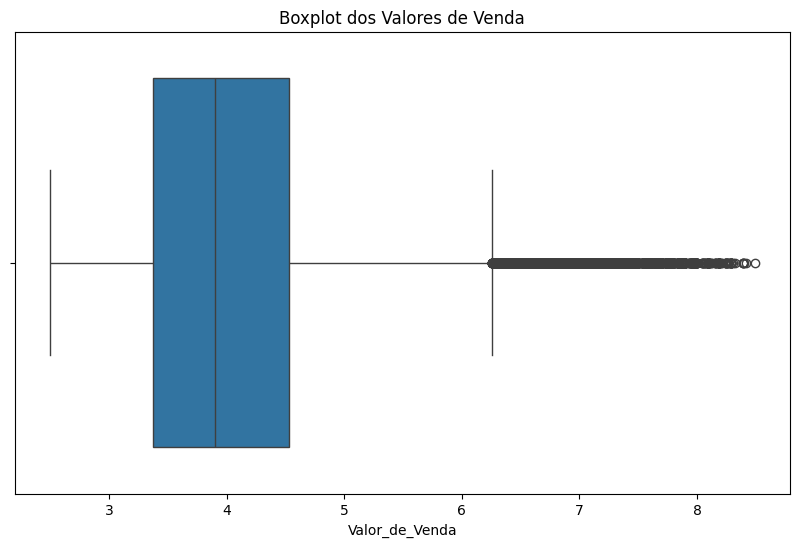

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para visualizar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=gasolina_df_6['Valor_de_Venda'])
plt.title('Boxplot dos Valores de Venda')
plt.show()


In [42]:
indices_outliers_venda = outliers.index.get_level_values(1)
gasolina_df = gasolina_df.drop(index=indices_outliers_venda)

# Tratamento de dados ausentes

In [43]:
print(gasolina_df.isnull().sum())

Regiao                  0
Estado                  0
Municipio               0
Revenda                 0
CNPJ_da_Revenda         0
Nome_da_Rua             0
Numero_Rua            111
Complemento        143528
Bairro                633
Cep                     0
Data_da_Coleta          0
Valor_de_Venda          0
Valor_de_Compra    120952
Bandeira                0
ano                     0
dtype: int64


Como complemento e bairro são informações opcionais para o problema escolhido, vamos tratar apenas os valores ausentes para a coluna 'Valor de Compra'

In [ ]:
gasolina_df['Valor_de_Compra'].describe()

count    69583.000000
mean         3.284012
std          0.569872
min          2.220000
25%          2.789900
50%          3.227100
75%          3.750000
max          5.024000
Name: Valor_de_Compra, dtype: float64

Abaixo faremos a imputação da média e da mediana nos valores ausentes

In [ ]:
gasolina_df_2 = gasolina_df['Valor_de_Compra'].fillna(gasolina_df['Valor_de_Compra'].mean())
gasolina_df_2.describe()

count    190760.000000
mean          3.284012
std           0.344178
min           2.220000
25%           3.284012
50%           3.284012
75%           3.284012
max           5.024000
Name: Valor_de_Compra, dtype: float64

In [ ]:
gasolina_df_3 = gasolina_df['Valor_de_Compra'].fillna(gasolina_df['Valor_de_Compra'].median())
gasolina_df_3.describe()

count    190760.000000
mean          3.247860
std           0.345267
min           2.220000
25%           3.227100
50%           3.227100
75%           3.227100
max           5.024000
Name: Valor_de_Compra, dtype: float64

Apesar de não haver alteração considerável na média e do desvio padrão ter diminuído, em ambos os métodos os percentis são afetados consideravelmente. Esse resultado provavelmente está relacionado ao fato de que o preço da gasolina subiu ao longo do tempo. Dessa forma, um método eficiente de imputação deve respeitar o aumento do preço ao longo do tempo.

Abaixo vamos fazer uma imputação de valores através de interpolação temporal. A princípio vamos remover colunas que não devem ter impacto nos valores esperados de modo a reduzir a dimensionalidade dos dados.

In [ ]:
gasolina_df_4 = gasolina_df.drop(columns=['Revenda', 'CNPJ_da_Revenda', 'Nome_da_Rua', 'Numero_Rua', 'Complemento', 'Bairro', 'Cep'])

In [ ]:
gasolina_df_4 = gasolina_df_4.set_index('Data_da_Coleta')
gasolina_df_4['Valor_de_Compra'] = gasolina_df_4['Valor_de_Compra'].interpolate(method='time')
gasolina_df_4 = gasolina_df_4.reset_index()

gasolina_df['Valor_de_Compra'] = gasolina_df_4['Valor_de_Compra'].loc[gasolina_df.index]

In [ ]:
gasolina_df_4['Valor_de_Compra'].describe()

count    190758.000000
mean          3.328948
std           0.540651
min           2.220000
25%           2.896100
50%           3.398900
75%           3.700000
max           5.024000
Name: Valor_de_Compra, dtype: float64

In [ ]:
print(gasolina_df_4.isnull().sum())

Data_da_Coleta     0
Regiao             0
Estado             0
Municipio          0
Valor_de_Venda     0
Valor_de_Compra    2
Bandeira           0
dtype: int64


In [ ]:
gasolina_df_4.head()

,Data_da_Coleta,Regiao,Estado,Municipio,Valor_de_Venda,Valor_de_Compra,Bandeira
0,2020-01-21,N,PA,BELEM,4.599,NaN,IPIRANGA
1,2014-12-02,SE,SP,CANAS,2.799,NaN,COSAN
2,2015-06-02,N,PA,BELEM,3.399,2.9300,SABBÁ
3,2021-04-19,NE,BA,ITABUNA,5.890,3.4659,BRANCA
4,2021-07-26,NE,SE,ARACAJU,5.985,3.4659,PETROX DISTRIBUIDORA


# Normalização

Como a interpolação temporal depende do espaçamento entre as datas, há a possibilidade de ainda restarem valores ausentes. Nesse caso, os dados serão normalizados para em seguida imputarmos os dados ausentes através do knn

In [ ]:
# Removendo e adaptando colunas para o cálculo da distância euclidiana
gasolina_df_5 = gasolina_df_4.drop(columns=['Estado','Regiao','Municipio','Bandeira'])

gasolina_df_5['Data_da_Coleta'] = pd.to_datetime(gasolina_df_5['Data_da_Coleta'])
gasolina_df_5['Ano'] = gasolina_df_5['Data_da_Coleta'].dt.year
gasolina_df_5['Mes'] = gasolina_df_5['Data_da_Coleta'].dt.month
gasolina_df_5['Dia'] = gasolina_df_5['Data_da_Coleta'].dt.day
gasolina_df_5 = gasolina_df_5.drop('Data_da_Coleta', axis=1)

In [ ]:
gasolina_df_5.head()

,Valor_de_Venda,Valor_de_Compra,Ano,Mes,Dia
0,4.599,NaN,2020,1,21
1,2.799,NaN,2014,12,2
2,3.399,2.9300,2015,6,2
3,5.890,3.4659,2021,4,19
4,5.985,3.4659,2021,7,26


In [ ]:
import numpy as np

dist = np.linalg.norm(gasolina_df_5.values[2]-gasolina_df_5.values[3])
print(dist)

18.31644806751571


Normalização entre 0 e 1

In [ ]:
gasolina_df_5['Valor_de_Venda'] = (gasolina_df_5['Valor_de_Venda'] - gasolina_df_5['Valor_de_Venda'].min()) / (gasolina_df_5['Valor_de_Venda'].max() - gasolina_df_5['Valor_de_Venda'].min())
gasolina_df_5['Valor_de_Compra'] = (gasolina_df_5['Valor_de_Compra'] - gasolina_df_5['Valor_de_Compra'].min()) / (gasolina_df_5['Valor_de_Compra'].max() - gasolina_df_5['Valor_de_Compra'].min())
gasolina_df_5['Ano'] = (gasolina_df_5['Ano'] - gasolina_df_5['Ano'].min()) / (gasolina_df_5['Ano'].max() - gasolina_df_5['Ano'].min())
gasolina_df_5['Mes'] = (gasolina_df_5['Mes'] - gasolina_df_5['Mes'].min()) / (gasolina_df_5['Mes'].max() - gasolina_df_5['Mes'].min())
gasolina_df_5['Dia'] = (gasolina_df_5['Dia'] - gasolina_df_5['Dia'].min()) / (gasolina_df_5['Dia'].max() - gasolina_df_5['Dia'].min())

dist = np.linalg.norm(gasolina_df_5.values[2]-gasolina_df_5.values[3])
print(dist)

0.9564554589663667


In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

gasolina_df_5['Valor_de_Compra'] = imputer.fit_transform(gasolina_df_5[['Valor_de_Compra']])[:, 0]
gasolina_df_5.head()

,Valor_de_Venda,Valor_de_Compra,Ano,Mes,Dia
0,0.349488,0.395488,0.6,0.000000,0.666667
1,0.056757,0.395488,0.0,1.000000,0.033333
2,0.154334,0.253210,0.1,0.454545,0.033333
3,0.559441,0.444330,0.7,0.272727,0.600000
4,0.574890,0.444330,0.7,0.545455,0.833333


In [ ]:
print(gasolina_df_5.isnull().sum())

Valor_de_Venda     0
Valor_de_Compra    0
Ano                0
Mes                0
Dia                0
dtype: int64


In [ ]:
gasolina_df_5['Valor_de_Compra'] = gasolina_df_5['Valor_de_Compra'] * (gasolina_df_4['Valor_de_Compra'].max() - gasolina_df_4['Valor_de_Compra'].min()) + gasolina_df_4['Valor_de_Compra'].min()
gasolina_df['Valor_de_Compra'] = gasolina_df_5['Valor_de_Compra'].loc[gasolina_df.index]

In [ ]:
print(gasolina_df.isnull().sum())

Regiao                  0
Estado                  0
Municipio               0
Revenda                 0
CNPJ_da_Revenda         0
Nome_da_Rua             0
Numero_Rua            110
Complemento        143805
Bairro                680
Cep                     0
Data_da_Coleta          0
Valor_de_Venda          0
Valor_de_Compra         0
Bandeira                0
dtype: int64


A imputação pode ter gerado entradas com o valor de compra maior do que o de venda. Como essa situação não faz sentido para o nosso problema, vamos verificar se realmente acontece e remover essas entradas em caso positivo.

In [ ]:
gasolina_df.shape

(190760, 14)

In [ ]:
invalid_entries = gasolina_df[gasolina_df['Valor_de_Compra'] > gasolina_df['Valor_de_Venda']]

gasolina_df = gasolina_df.drop(invalid_entries.index)

In [ ]:
gasolina_df.shape

(185405, 14)

# Estatísticas descritivas

Partindo do conhecimento do domínio, há a suspeita de que o Valor de Compra se relaciona com a Bandeira, com a data da coleta e com o Valor de Venda. Para confirmar, vamos calcular a correlação sobre uma amostra contendo apenas as 3 bandeiras e os 3 estados que mais aparecem no dataset.

O cálculo será feita sobre uma amostra ao invés do dataset completo para respeitar as limitações de recursos do Collab.

In [ ]:
# Obter as top 3 bandeiras e estados
top_3_bandeiras = gasolina_df['Bandeira'].value_counts().head(3).index.to_list()
top_3_estados = gasolina_df['Estado'].value_counts().head(3).index.to_list()


gasolina_df_sample = gasolina_df[
    (gasolina_df['Bandeira'].isin(top_3_bandeiras)) &
    (gasolina_df['Estado'].isin(top_3_estados))
]

sampled_df = gasolina_df_sample.copy()
sampled_df = sampled_df.drop(columns=['Regiao', 'Municipio', 'Revenda', 'CNPJ_da_Revenda', 'Nome_da_Rua', 'Numero_Rua', 'Complemento', 'Bairro', 'Cep'])

sampled_df['Bandeira'] = sampled_df['Bandeira'].cat.remove_unused_categories()
sampled_df['Estado'] = sampled_df['Estado'].cat.remove_unused_categories()

sampled_df['Ano'] = sampled_df['Data_da_Coleta'].dt.year
sampled_df = sampled_df.drop('Data_da_Coleta', axis=1)

sampled_df = pd.get_dummies(sampled_df, drop_first=False)

sampled_df.head()


,Valor_de_Venda,Valor_de_Compra,Ano,Estado_MG,Estado_RJ,Estado_SP,Bandeira_BRANCA,Bandeira_IPIRANGA,Bandeira_PETROBRAS DISTRIBUIDORA S.A.
7,3.599,2.9779,2016,False,False,True,False,True,False
9,2.709,2.6721,2014,False,False,True,True,False,False
10,4.597,4.1125,2020,False,False,True,False,True,False
12,4.078,3.4890,2018,False,False,True,True,False,False
17,5.579,3.4659,2021,False,False,True,False,True,False


In [ ]:
pip install plotly

In [ ]:
import plotly.express as px

correlation_matrix = sampled_df.corr(method='spearman')

fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu_r',
                aspect="auto")

# Atualizar o layout
fig.update_layout(title='Mapa de Calor da Matriz de Correlação')

# Mostrar o gráfico
fig.show()

Há uma forte correlação do Valor de Compra com o Valor de Venda e com o Ano da coleta. No entanto a Bandeira não se relaciona significativamente.

Abaixo vamos visualizar a relação Valor_de_Venda x Valor_de_Compra

In [ ]:
fig = px.scatter(gasolina_df, x='Valor_de_Venda', y='Valor_de_Compra')
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig.show()

In [ ]:
# Agrupa o dataset por estados e por ano
grouped_df = gasolina_df.drop(columns=['Revenda', 'CNPJ_da_Revenda', 'Nome_da_Rua', 'Numero_Rua', 'Complemento', 'Bairro', 'Cep'])

grouped_df['Ano'] = grouped_df['Data_da_Coleta'].dt.year
grouped_df = grouped_df.drop('Data_da_Coleta', axis=1)

grouped_df = grouped_df.groupby(['Estado', 'Ano'])[['Valor_de_Venda', 'Valor_de_Compra']].mean()

# Calcula a diferença das médias do valor de compra e de venda
grouped_df['Diferença'] = grouped_df['Valor_de_Venda'] - grouped_df['Valor_de_Compra']

fig = px.line(grouped_df.reset_index(), x='Ano', y='Diferença', color='Estado')
fig.show()

# Testes de hipótese

Utilizaremos ANOVA para testar as hipóteses:
--------------------------------------------
* **H0:** As médias dos valores de venda são iguais entre os municípios.
* **H1:** Pelo menos uma das médias dos valores de venda é diferente entre os municípios.
--------------------------------------------
* **H0:** As médias dos valores de venda da gasolina são iguais para todos os anos.
* **H1:** Pelo menos um ano tem uma média diferente dos outros anos.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Directly fit the intended model with your DataFrame 'gasolina_df'

grouped_df = gasolina_df.drop(columns=['Revenda', 'CNPJ_da_Revenda', 'Nome_da_Rua', 'Numero_Rua', 'Complemento', 'Bairro', 'Cep'])

grouped_df['Ano'] = grouped_df['Data_da_Coleta'].dt.year
grouped_df = grouped_df.drop('Data_da_Coleta', axis=1)

model = ols('Valor_de_Venda ~ C(Municipio) + C(Ano)', data=grouped_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                     sum_sq        df              F  PR(>F)
C(Municipio)    7345.522406     592.0     150.173680     0.0
C(Ano)        148357.663713      10.0  179557.200923     0.0
Residual       15269.113591  184802.0            NaN     NaN


Considerando o nível de significância α = 0.05, temos que:
* há uma diferença significativa entre os preços de venda entre os municípios
* há diferenças significativas nos preços de venda ao longo do tempo.

Ambas hipóteses nulas são rejeitadas

In [ ]:
grouped_df.head()

,Regiao,Estado,Municipio,Valor_de_Venda,Valor_de_Compra,Bandeira,Ano
0,N,PA,BELEM,4.599,3.328948,IPIRANGA,2020
2,N,PA,BELEM,3.399,2.930000,SABBÁ,2015
3,NE,BA,ITABUNA,5.890,3.465900,BRANCA,2021
4,NE,SE,ARACAJU,5.985,3.465900,PETROX DISTRIBUIDORA,2021
5,NE,BA,FEIRA DE SANTANA,3.799,3.419000,PETROBRAS DISTRIBUIDORA S.A.,2017


In [ ]:
# Definir o modelo
model_municipio = ols('Valor_de_Venda ~ C(Municipio)', data=grouped_df).fit()

# Realizar ANOVA
anova_table_municipio = sm.stats.anova_lm(model_municipio, typ=2)
print(anova_table_municipio)


                     sum_sq        df          F  PR(>F)
C(Municipio)   10711.854877     592.0  20.437076     0.0
Residual      163626.777304  184812.0        NaN     NaN


In [ ]:
import scipy.stats as stats

# Definir o modelo
model_municipio = ols('Valor_de_Venda ~ C(Bandeira)', data=grouped_df).fit()

# Realizar ANOVA
anova_table_municipio = sm.stats.anova_lm(model_municipio, typ=2)
print(anova_table_municipio)

alpha = 0.05
df_model_bandeira = anova_table_municipio['df'][0]
df_residual_bandeira = anova_table_municipio['df'][1]
f_critical_bandeira = stats.f.ppf(1 - alpha, df_model_bandeira, df_residual_bandeira)
print(f"F crítico para Bandeira: {f_critical_bandeira}")

                    sum_sq        df           F  PR(>F)
C(Bandeira)   26738.844014      98.0  342.547103     0.0
Residual     147599.788168  185306.0         NaN     NaN
F crítico para Bandeira: 1.2460850594467703


In [ ]:
# Definir o modelo
model_municipio = ols('Valor_de_Venda ~ C(Regiao)', data=grouped_df).fit()

# Realizar ANOVA
anova_table_municipio = sm.stats.anova_lm(model_municipio, typ=2)
print(anova_table_municipio)

                  sum_sq        df           F         PR(>F)
C(Regiao)    1004.031784       4.0  268.479998  1.593243e-230
Residual   173334.600397  185400.0         NaN            NaN


In [ ]:
# Definir o modelo
model_municipio = ols('Valor_de_Venda ~ C(Estado)', data=grouped_df).fit()

# Realizar ANOVA
anova_table_municipio = sm.stats.anova_lm(model_municipio, typ=2)
print(anova_table_municipio)

                  sum_sq        df           F  PR(>F)
C(Estado)    4723.061299      26.0  198.537573     0.0
Residual   169615.570882  185378.0         NaN     NaN
